# Deep CNN in TensorFlow for Fashion MNIST

In this notebook, we adapt our [LeNet-5-inspired CNN](https://github.com/jonkrohn/DLTFpT/blob/master/notebooks/lenet_in_tensorflow.ipynb) for classifying Fashion MNIST images.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/lenet_in_tensorflow_for_fashion_MNIST.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist # new!
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D 
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


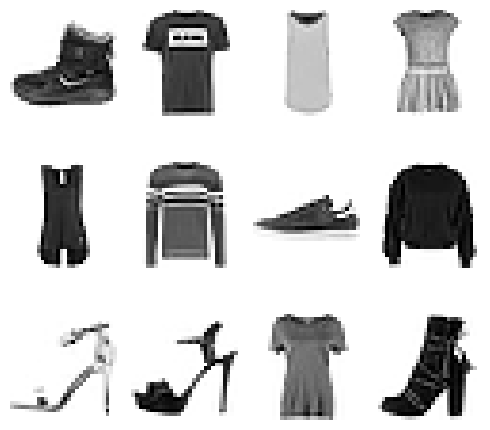

In [3]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

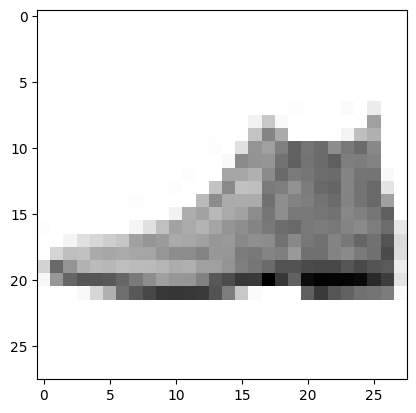

In [4]:
plt.imshow(X_valid[0], cmap='Greys')

In [5]:
y_valid[0]

np.uint8(9)

#### Preprocess data

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [7]:
X_train /= 255
X_valid /= 255

In [8]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

#### Design neural network architecture

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

c:\Users\maxce\deeplearning-notebooks\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

#### Configure model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

#### Train!

In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_valid, y_valid))

469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7370 - loss: 0.7498 - val_accuracy: 0.8771 - val_loss: 0.3401


#### Performing inference

In [13]:
valid_0 = X_valid[0].reshape(1, 28, 28, 1)

In [14]:
model.predict(valid_0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[7.8421208e-06, 2.4166623e-06, 9.0670537e-06, 1.7927052e-05,
        1.3466199e-05, 2.6120062e-03, 4.0623509e-05, 1.2148850e-01,
        3.8147150e-04, 8.7542665e-01]], dtype=float32)

In [15]:
model.predict_classes(valid_0)

AttributeError: 'Sequential' object has no attribute 'predict_classes'